<a href="https://colab.research.google.com/github/imatar/practica_part_II/blob/main/Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify
!pip install dash

In [2]:
# Importar llibreries necessàries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import io
import base64
from dash import Dash, dcc, html

In [3]:
# Muntar Google Drive
drive.mount("/content/drive")

# Carregar el dataset
dataset = pd.read_csv(
    "/content/drive/My Drive/Visualització de dades/dataset_net.csv",
    encoding="latin1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Visualitzar dataset
dataset.head()

,Numero RAC,Numero CAU,Seccio registre,Subseccio registre,Data d'inscripcio,Data de posada en servei,Potencia,Tecnologia,Codi IDESCAT municipi,Municipi,Codi INE comarca,Comarca
0,00043,ES0031405745609001XP0FA000,Amb excedents,b1,07/10/2019,05/11/1987,808.0,HIDROELECTRICA,80168.0,Baga,14.0,Bergueda
1,00047,ES0031405888699001KQ0FA000,Amb excedents,b1,14/07/2020,14/07/2020,360.0,HIDROELECTRICA,80924.0,Gironella,14.0,Bergueda
2,00100,ES0031405967968001HE0FA000,Amb excedents,b1,08/10/2019,25/06/1991,1940.0,HIDROELECTRICA,80193.0,Barcelona,13.0,Barcelones
3,00103,ES0031405997396001FM0FA000,Amb excedents,b2,04/10/2019,06/11/1998,4694.0,COGENERACIO,80193.0,Barcelona,13.0,Barcelones
4,00156,ES0031406114854001WH0FA000,Amb excedents,b1,01/03/2021,20/06/1990,350.0,RESIDUS,170792.0,Girona,20.0,Girones


In [5]:
# Informació del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112526 entries, 0 to 112525
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Numero RAC                112526 non-null  object 
 1   Numero CAU                102448 non-null  object 
 2   Seccio registre           102448 non-null  object 
 3   Subseccio registre        100412 non-null  object 
 4   Data d'inscripcio         102448 non-null  object 
 5   Data de posada en servei  102448 non-null  object 
 6   Potencia                  102447 non-null  float64
 7   Tecnologia                102447 non-null  object 
 8   Codi IDESCAT municipi     102446 non-null  float64
 9   Municipi                  102448 non-null  object 
 10  Codi INE comarca          102447 non-null  float64
 11  Comarca                   102448 non-null  object 
dtypes: float64(3), object(9)
memory usage: 10.3+ MB


In [6]:
# Convertir dates al format datetime
dataset["Data d'inscripcio"] = pd.to_datetime(dataset["Data d'inscripcio"], errors="coerce", dayfirst=True)
dataset["Data de posada en servei"] = pd.to_datetime(dataset["Data de posada en servei"], errors="coerce", dayfirst=True)

# Treure NaN
dataset = dataset.dropna(subset=["Tecnologia", "Data de posada en servei", "Data d'inscripcio"])

# Ordre llista tecnologies
ordre_tec = sorted(dataset["Tecnologia"].unique())

# Evolució temporal

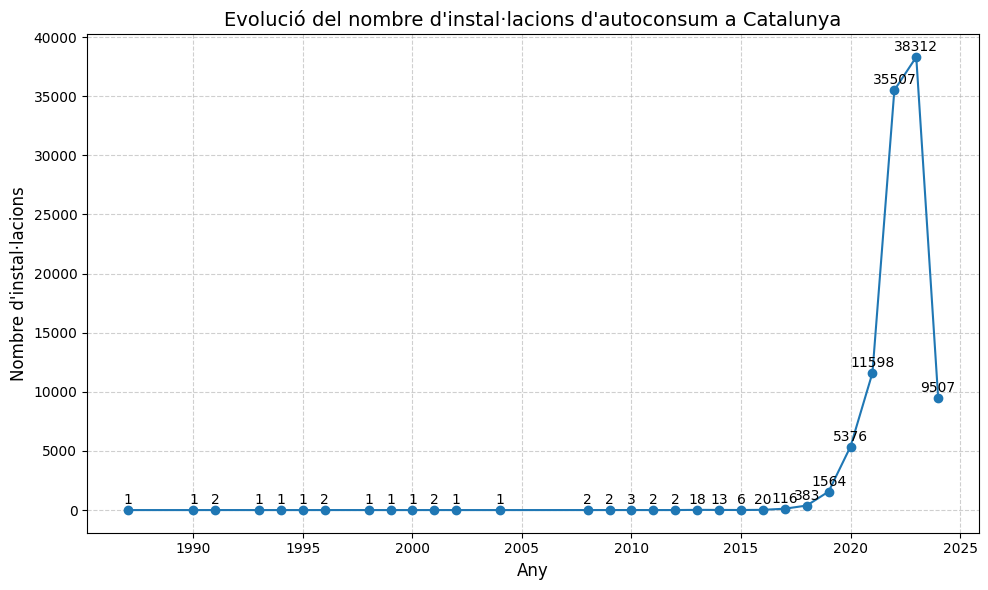

In [7]:
# Evolució del nombre d'instal·lacions
dataset["Posada en servei"] = dataset["Data de posada en servei"].dt.year
inst_any = dataset.groupby("Posada en servei").size().reset_index(name="Nombre d'instal·lacions")


fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(inst_any["Posada en servei"], inst_any["Nombre d'instal·lacions"], marker="o")

for x, y in zip(inst_any["Posada en servei"], inst_any["Nombre d'instal·lacions"]):
    ax1.text(x, y + 500, str(y), ha="center", fontsize=10)

ax1.set_title("Evolució del nombre d'instal·lacions d'autoconsum a Catalunya", fontsize=14)
ax1.set_xlabel("Any", fontsize=12)
ax1.set_ylabel("Nombre d'instal·lacions", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
fig1.show()

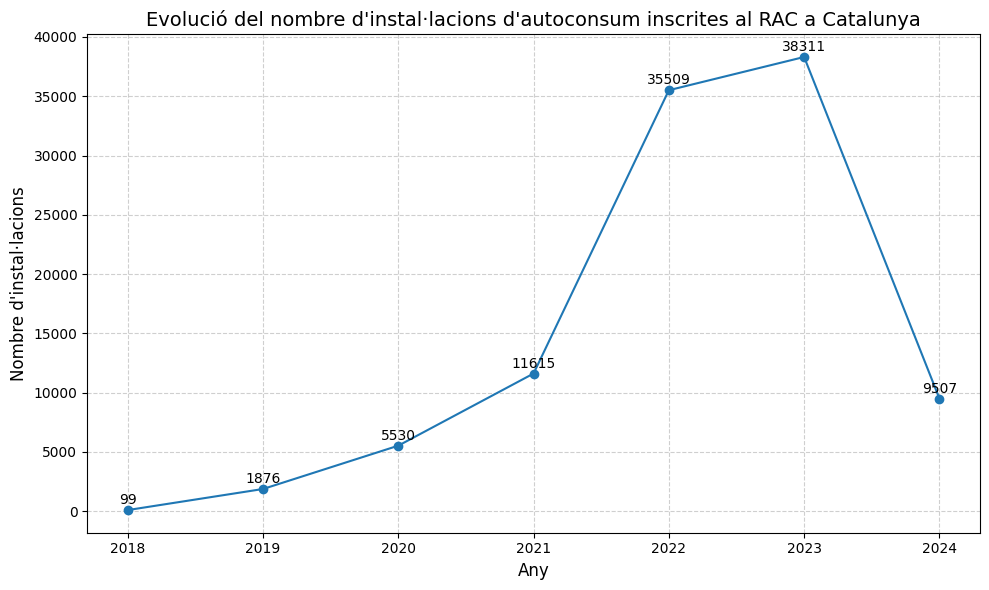

In [8]:
# Evolució del nombre d'instal·lacions inscrites al Registre d’Autoconsum de Catalunya
dataset["Any Inscripcio"] = dataset["Data d'inscripcio"].dt.year
inscr_any = dataset.groupby("Any Inscripcio").size().reset_index(name="Nombre d'instal·lacions")

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(inscr_any["Any Inscripcio"], inscr_any["Nombre d'instal·lacions"], marker="o")

for x, y in zip(inscr_any["Any Inscripcio"], inscr_any["Nombre d'instal·lacions"]):
    ax2.text(x, y + 500, str(y), ha="center", fontsize=10)

ax2.set_title("Evolució del nombre d'instal·lacions d'autoconsum inscrites al RAC a Catalunya", fontsize=14)
ax2.set_xlabel("Any", fontsize=12)
ax2.set_ylabel("Nombre d'instal·lacions", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
fig2.show()

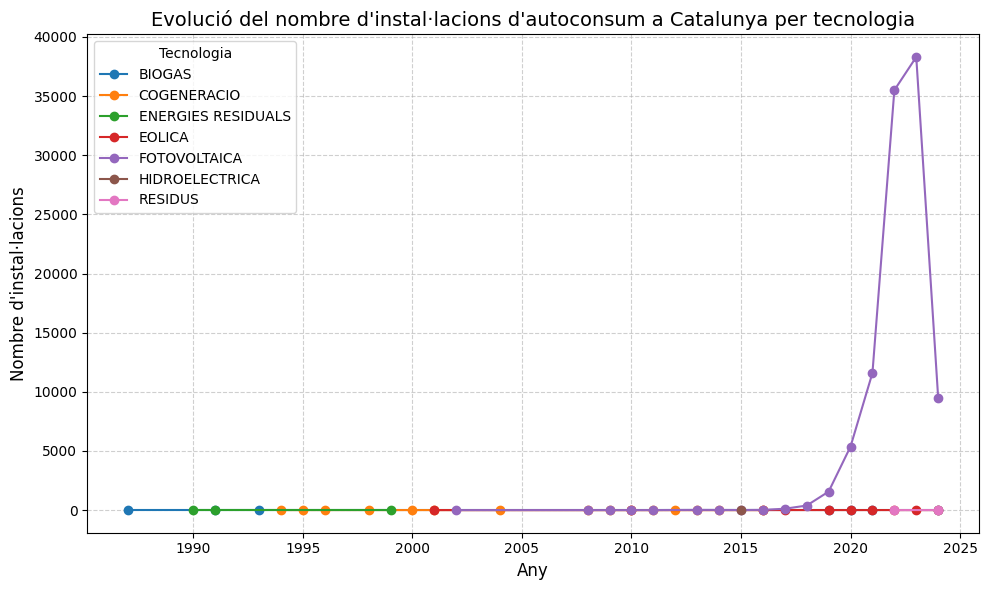

In [9]:
fig3, ax3 = plt.subplots(figsize=(10, 6))

for tecnologia in dataset["Tecnologia"].unique():
    inst_any = dataset[dataset["Tecnologia"] == tecnologia].groupby("Posada en servei").size().reset_index(name="Nombre d'instal·lacions")
    ax3.plot(inst_any["Posada en servei"], inst_any["Nombre d'instal·lacions"], marker="o", label=tecnologia)

ax3.set_title("Evolució del nombre d'instal·lacions d'autoconsum a Catalunya per tecnologia", fontsize=14)
ax3.set_xlabel("Any", fontsize=12)
ax3.set_ylabel("Nombre d'instal·lacions", fontsize=12)
ax3.grid(True, linestyle="--", alpha=0.6)
ax3.legend(title="Tecnologia", labels=ordre_tec)
plt.tight_layout()
fig3.show()

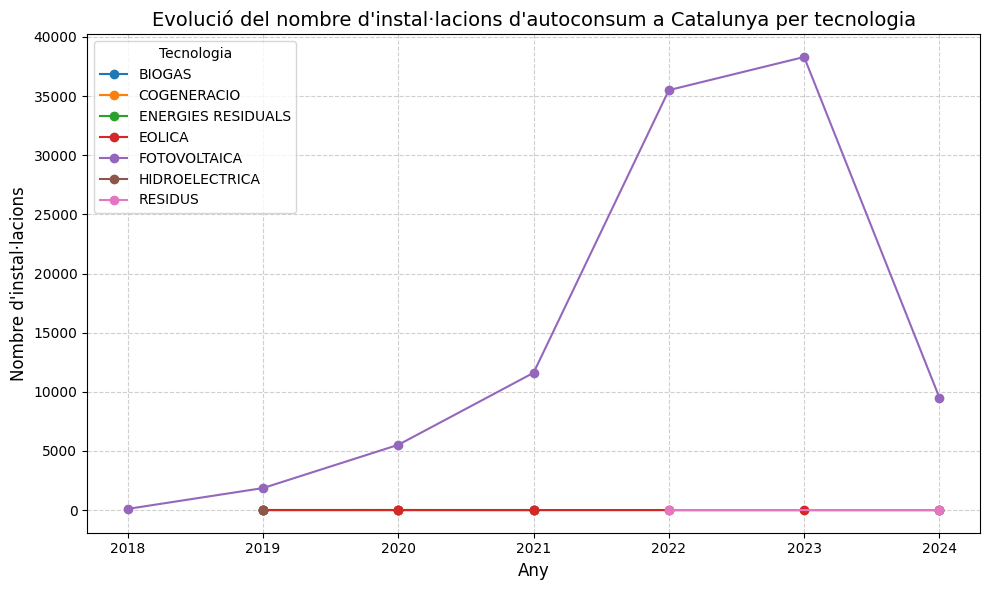

In [10]:
fig4, ax4 = plt.subplots(figsize=(10, 6))

for tecnologia in dataset["Tecnologia"].unique():
    inscr_any = dataset[dataset["Tecnologia"] == tecnologia].groupby("Any Inscripcio").size().reset_index(name="Nombre d'instal·lacions")
    ax4.plot(inscr_any["Any Inscripcio"], inscr_any["Nombre d'instal·lacions"], marker="o", label=tecnologia)
ax4.set_title("Evolució del nombre d'instal·lacions d'autoconsum a Catalunya per tecnologia", fontsize=14)
ax4.set_xlabel("Any", fontsize=12)
ax4.set_ylabel("Nombre d'instal·lacions", fontsize=12)
ax4.grid(True, linestyle="--", alpha=0.6)
ax4.legend(title="Tecnologia", labels=ordre_tec)
plt.tight_layout()
fig4.show()

# Tecnologies d'autoconsum

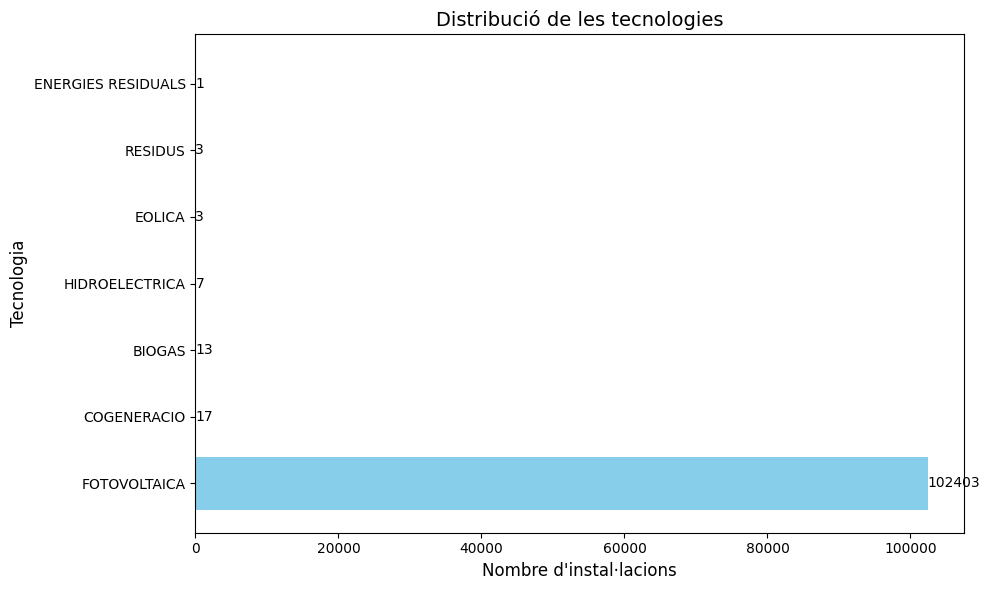

In [11]:
# Tipus de tecnologia més utilitzada
tec_distr = dataset.groupby("Tecnologia").size().reset_index(name="Nombre d'instal·lacions").sort_values(by="Nombre d'instal·lacions", ascending=False)

fig5, ax5 = plt.subplots(figsize=(10, 6))
bars = ax5.barh(tec_distr["Tecnologia"], tec_distr["Nombre d'instal·lacions"], color="skyblue")
ax5.set_title("Distribució de les tecnologies", fontsize=14)
ax5.set_xlabel("Nombre d'instal·lacions", fontsize=12)
ax5.set_ylabel("Tecnologia", fontsize=12)
ax5.tick_params(axis='x', labelsize=10)
ax5.tick_params(axis='y', labelsize=10)

for bar in bars:
    width = bar.get_width()
    ax5.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{int(width)}", va="center", fontsize=10)

plt.tight_layout()
fig5.show()

# Potències mitjanes

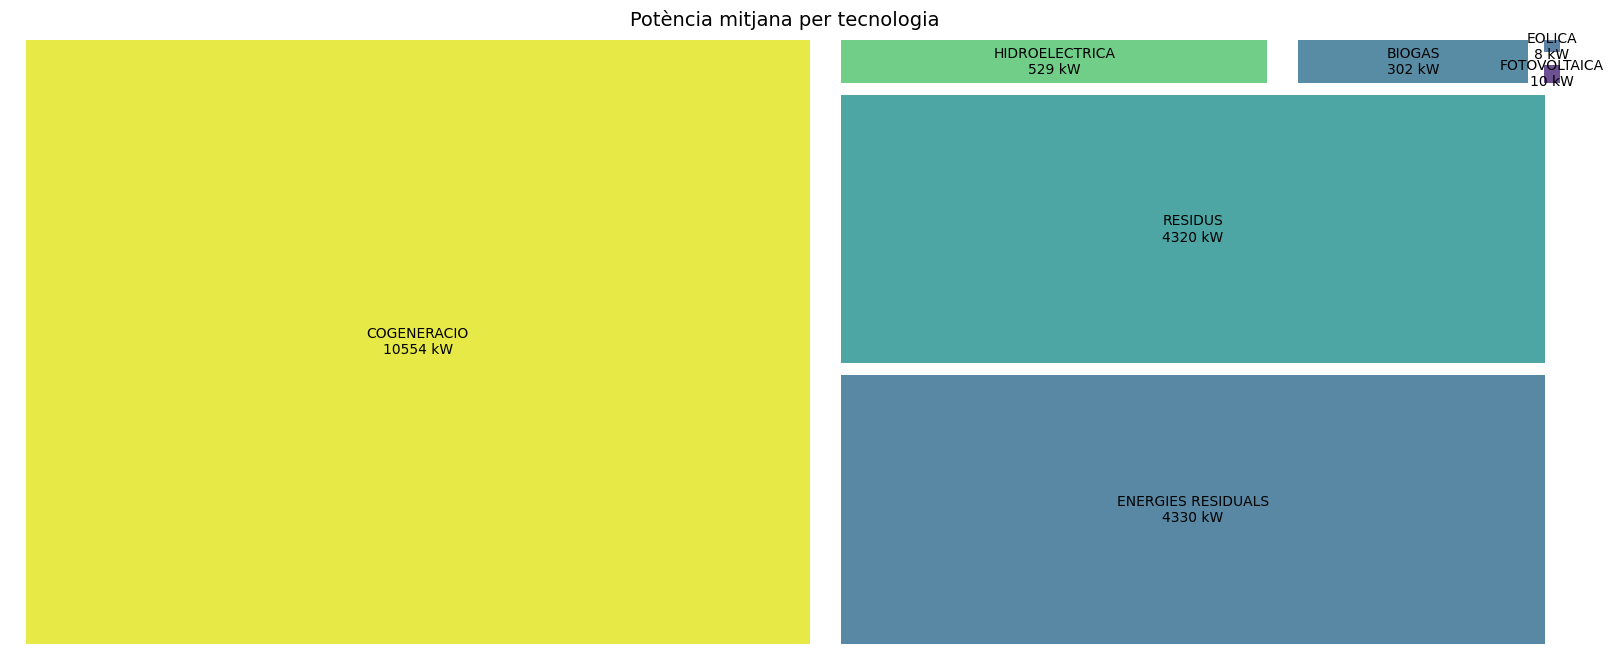

In [12]:
# Potència mitjana per tecnologia (treemap)
pot_tec = dataset.groupby("Tecnologia")["Potencia"].mean().reset_index().sort_values(by="Potencia", ascending=False)
pot_tec_labels = [f"{row['Tecnologia']}\n{int(row['Potencia'])} kW" for _, row in pot_tec.iterrows()]
pot_tec_sizes = pot_tec["Potencia"].values

fig6, ax6 = plt.subplots(figsize=(20, 8))
squarify.plot(sizes=pot_tec_sizes, label=pot_tec_labels, alpha=0.8, pad=True, ax=ax6)
ax6.set_title("Potència mitjana per tecnologia", fontsize=14)
ax6.axis("off")
fig6.show()

# Anàlisi per comarca

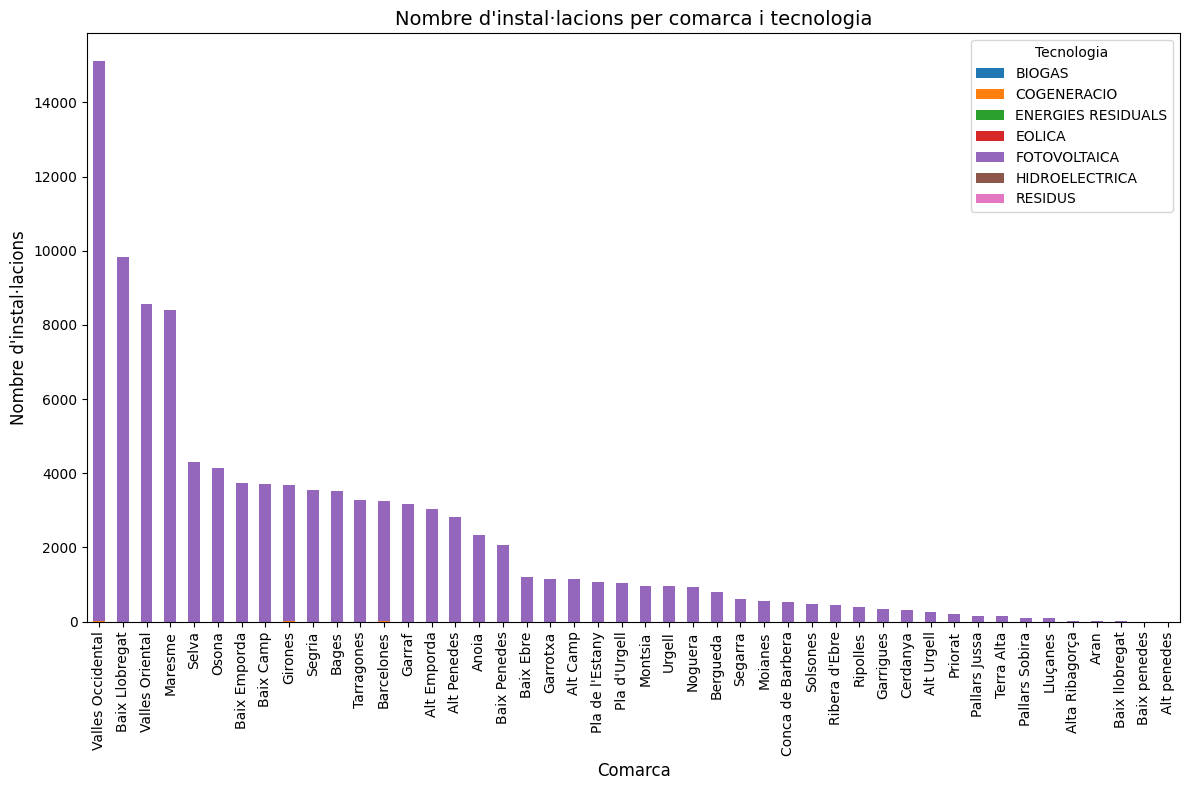

In [13]:
# Distribució territorial del nombre d'instal·lacions per comarca i tecnologia
com_tec = dataset.groupby(["Comarca", "Tecnologia"]).size().unstack(fill_value=0)
com_tec["Nombre dinstal·lacions"] = com_tec.sum(axis=1)
com_tec = com_tec.sort_values(by="Nombre dinstal·lacions", ascending=False)
com_tec = com_tec.drop(columns=["Nombre dinstal·lacions"])

fig7, ax7 = plt.subplots(figsize=(12, 8))
com_tec.plot(kind="bar", stacked=True, ax=ax7)
ax7.set_title("Nombre d'instal·lacions per comarca i tecnologia", fontsize=14)
ax7.set_xlabel("Comarca", fontsize=12)
ax7.set_ylabel("Nombre d'instal·lacions", fontsize=12)
ax7.set_xticklabels(com_tec.index, rotation=90)
plt.tight_layout()
ax7.legend(title="Tecnologia", labels=ordre_tec)
fig7.show()

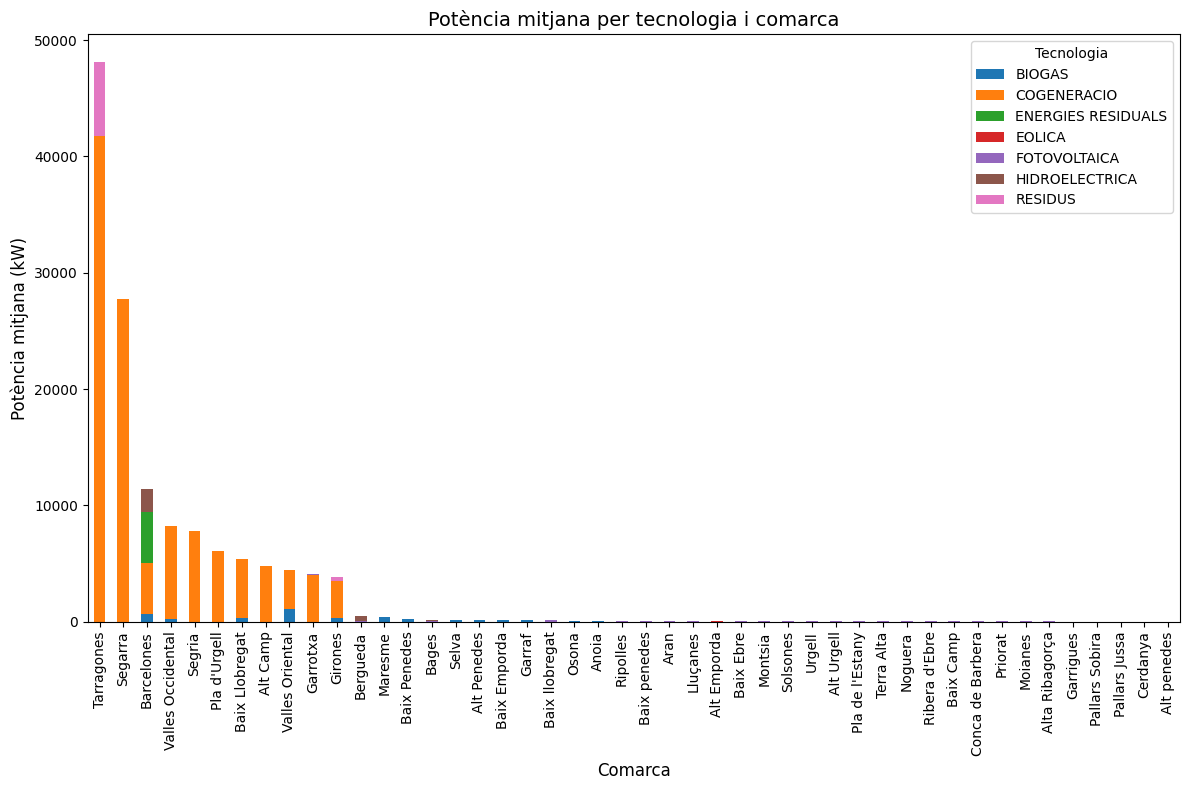

In [14]:
# Potència mitjana per comarca i tecnologia
com_tec_pot = dataset.groupby(["Comarca", "Tecnologia"])["Potencia"].mean().unstack()
com_tec_pot["Nombre dinstal·lacions"] = com_tec_pot.sum(axis=1)
com_tec_pot = com_tec_pot.sort_values(by="Nombre dinstal·lacions", ascending=False)
com_tec_pot = com_tec_pot.drop(columns=["Nombre dinstal·lacions"])

fig8, ax8 = plt.subplots(figsize=(12, 8))
com_tec_pot.plot(kind="bar", stacked=True, ax=ax8)
ax8.set_title("Potència mitjana per tecnologia i comarca", fontsize=14)
ax8.set_xlabel("Comarca", fontsize=12)
ax8.set_ylabel("Potència mitjana (kW)", fontsize=12)
ax8.set_xticklabels(com_tec_pot.index, rotation=90)
plt.tight_layout()
ax8.legend(title="Tecnologia", labels=ordre_tec)
fig8.show()

# Tipus d'autoconsum

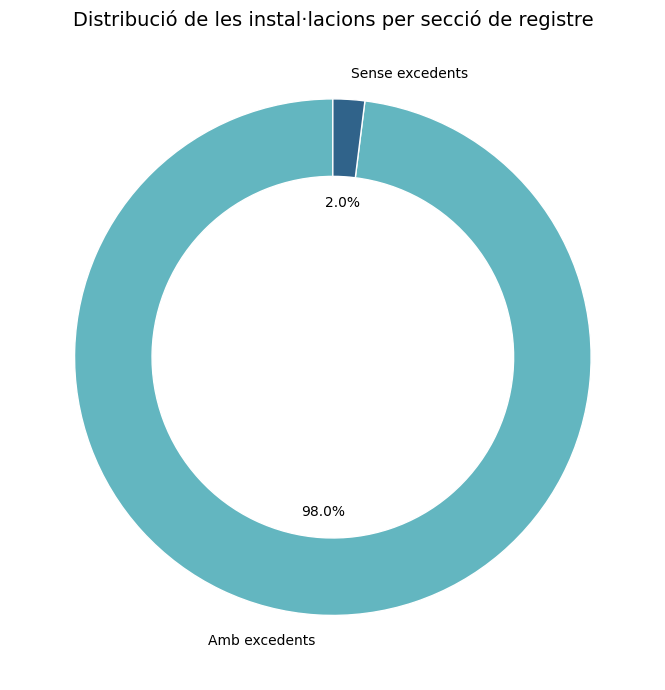

In [15]:
# Secció registre
seccio_registre = dataset["Seccio registre"].value_counts()
sr_colors = ["#63B6C0", "#30638A"]

fig9, ax9 = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = ax9.pie(
    seccio_registre,
    labels=seccio_registre.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    textprops=dict(color="black"),
    colors=sr_colors
)

centre_circle = plt.Circle((0, 0), 0.5, fc="white")
ax9.add_artist(centre_circle)
plt.setp(autotexts, size=10)
ax9.set_title("Distribució de les instal·lacions per secció de registre", fontsize=14)
plt.tight_layout()
fig9.show()

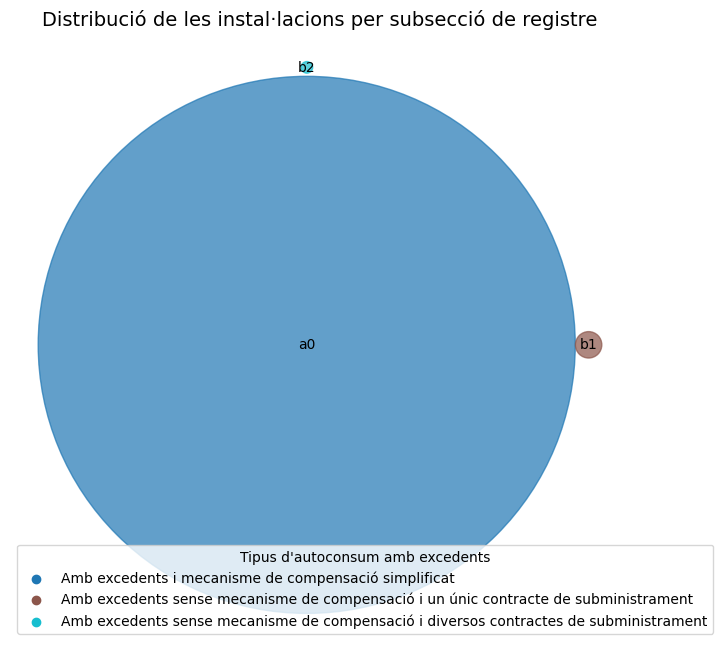

In [16]:
# Subseccio registre
# https://matplotlib.org/stable/gallery/misc/packed_bubbles.html
subseccio_registre = dataset["Subseccio registre"].value_counts()

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)
        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3])

    def outline_distance(self, bubble, bubbles):
        center_distance = np.hypot(bubble[0] - bubbles[:, 0], bubble[1] - bubbles[:, 1])
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collapse(self, n_iterations=50):
        for _ in range(n_iterations):
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                else:
                    self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            circ = plt.Circle(self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i], alpha=0.7)
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i], horizontalalignment="center", verticalalignment="center")

sbr_labels = subseccio_registre.index
sbr_values = subseccio_registre.values
sbr_colors = plt.cm.tab10(np.linspace(0, 1, len(sbr_labels)))

sbr_legend = [
    "Amb excedents i mecanisme de compensació simplificat",
    "Amb excedents sense mecanisme de compensació i un únic contracte de subministrament",
    "Amb excedents sense mecanisme de compensació i diversos contractes de subministrament",
]

bubble_chart = BubbleChart(area=sbr_values, bubble_spacing=0.1)
bubble_chart.collapse()
fig10, ax10 = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax10, sbr_labels, sbr_colors)

# Add legend
for i, label in enumerate(sbr_legend):
    ax10.scatter([], [], color=sbr_colors[i], label=label)

ax10.legend(loc="best", title="Tipus d'autoconsum amb excedents")
ax10.axis("off")
ax10.relim()
ax10.autoscale_view()
ax10.set_title("Distribució de les instal·lacions per subsecció de registre", fontsize=14)
fig10.show()

# Dashboard

In [17]:
# Funció per passar de matplotlib a base64-encoded
def matplotlib_to_base64(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    encoded_image = base64.b64encode(buf.read()).decode("utf-8")
    buf.close()
    return f"data:image/png;base64,{encoded_image}"

In [18]:
# Conversió imatges
fig1_image = matplotlib_to_base64(fig1)
fig2_image = matplotlib_to_base64(fig2)
fig3_image = matplotlib_to_base64(fig3)
fig4_image = matplotlib_to_base64(fig4)
fig5_image = matplotlib_to_base64(fig5)
fig6_image = matplotlib_to_base64(fig6)
fig7_image = matplotlib_to_base64(fig7)
fig8_image = matplotlib_to_base64(fig8)
fig9_image = matplotlib_to_base64(fig9)
fig10_image = matplotlib_to_base64(fig10)

In [19]:
# Dashboard
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Autoconsum a Catalunya", style={"textAlign": "center", "color": "white"}),
    dcc.Tabs([
        # fig1 and fig2
        dcc.Tab(label="Evolució temporal", children=[
            html.Div([
                html.Img(src=fig1_image, style={"flex": "1", "width": "45%"}),
                html.Img(src=fig2_image, style={"flex": "1", "width": "45%"})
            ], style={"display": "flex", "justify-content": "space-between"})
        ]),
        # fig3 and fig4
        dcc.Tab(label="Evolució temporal per tecnologia", children=[
            html.Div([
                html.Img(src=fig3_image, style={"flex": "1", "width": "45%"}),
                html.Img(src=fig4_image, style={"flex": "1", "width": "45%"})
            ], style={"display": "flex", "justify-content": "space-between"})
        ]),
        # fig5 and fig6
        dcc.Tab(label="Distribució per tecnologia i potencia", children=[
            html.Div([
                html.Img(src=fig5_image, style={"flex": "0.5", "width": "45%"}),
                html.Img(src=fig6_image, style={"flex": "1", "width": "45%"})
            ], style={"display": "flex", "justify-content": "space-between"})
        ]),
        # fig7 and fig8
        dcc.Tab(label="Distribució per comarca", children=[
            html.Div([
                html.Img(src=fig7_image, style={"flex": "1", "width": "45%"}),
                html.Img(src=fig8_image, style={"flex": "1", "width": "45%"})
            ], style={"display": "flex", "justify-content": "space-between"})
        ]),
        # fig9 and fig10
        dcc.Tab(label="Tipus d'autoconsum", children=[
            html.Div([
                html.Img(src=fig9_image, style={"flex": "0.6", "width": "35%"}),
                html.Img(src=fig10_image, style={"flex": "1", "width": "25%"})
            ], style={"display": "flex", "justify-content": "space-between",
                      "background-color": "#FFFFFF"})
        ])
    ])
])

app.run_server(debug=True, port=8060)

<IPython.core.display.Javascript object>

# Descàrrega gràfics

In [20]:
# fig1.savefig("/content/drive/My Drive/Visualització de dades/fig1.png")
# fig2.savefig("/content/drive/My Drive/Visualització de dades/fig2.png")
# fig3.savefig("/content/drive/My Drive/Visualització de dades/fig3.png")
# fig4.savefig("/content/drive/My Drive/Visualització de dades/fig4.png")
# fig5.savefig("/content/drive/My Drive/Visualització de dades/fig5.png")
# fig6.savefig("/content/drive/My Drive/Visualització de dades/fig6.png")
# fig7.savefig("/content/drive/My Drive/Visualització de dades/fig7.png")
# fig8.savefig("/content/drive/My Drive/Visualització de dades/fig8.png")
# fig9.savefig("/content/drive/My Drive/Visualització de dades/fig9.png")
# fig10.savefig("/content/drive/My Drive/Visualització de dades/fig10.png")